## Task 2
### Part 1: Streaming data visualization

Reference from tutorial 9

In [24]:
# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import json

<IPython.core.display.Javascript object>


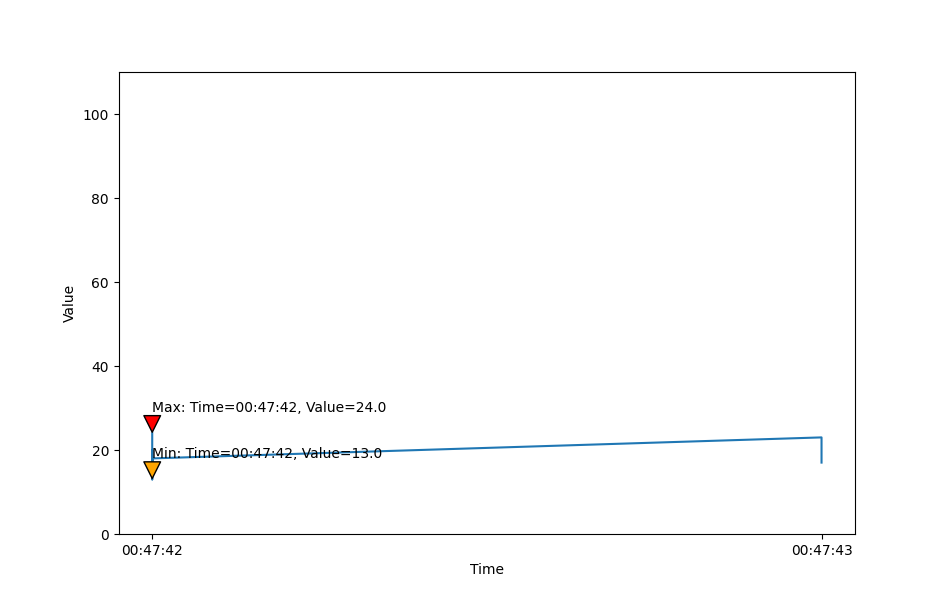

KeyboardInterrupt: 

In [26]:
# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'Asgn_PartB'

def annotate_max(x, y, ax = None):
    ymax = max(y)
    xpos = y.index(ymax)
    xmax = x[xpos]
    text = 'Max: Time={}, Value={}'.format(xmax, ymax)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+5), arrowprops=dict(facecolor='red', shrink=0.05),)
    
def annotate_min(x, y, ax = None):
    ymin = min(y)
    xpos = y.index(ymin)
    xmin = x[xpos]
    text = 'Min: Time={}, Value={}'.format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    ax.annotate(text, xy=(xmin, ymin), xytext=(xmin, ymin+5), arrowprops=dict(facecolor='orange', shrink=0.05),)

def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        ax = fig.add_subplot(111) # adding the subplot axes to the given grid position
        fig.suptitle('Real-time uniform stream data visualization with interesting points') # giving figure a title
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_ylim(0,110) 
        ax.set_yticks([0,20,40,60,80,100])
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax):
    try:
        # container for x and y values
        x, y = [], []
        # print('Waiting for messages')
        for message in consumer:
            #data = str(message.value.decode('utf-8')).split(', ')
            #x.append(data[0]) 
            #y.append(int(data[1]))
            #print(message)
            key = message.key.decode("utf-8")
            #print(key)
            if key == 'producer1':
                decode = str(message.value.decode('utf-8'))
                data = json.loads(decode)
                #print(data)
                x.append(dt.datetime.now().strftime("%X"))
                y.append(data['air_temperature_celcius'])
                #print(x)
                #print(y)
                # we start plotting only when we have 10 data points
                if len(y) > 10:
                    ax.clear()
                    ax.plot(x, y)
                    ax.set_xlabel('Time')
                    ax.set_ylabel('Value')
                    ax.set_ylim(0,110) 
                    ax.set_yticks([0,20,40,60,80,100])
                    annotate_max(x,y)
                    annotate_min(x,y)
                    fig.canvas.draw()
                    x.pop(0) # removing the item in the first position
                    y.pop(0)
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax = init_plots()
    consume_messages(consumer, fig, ax)

### Part 2 Static data visualization

In [12]:
import sys, getopt, pprint
from pymongo import MongoClient
from pprint import pprint
from datetime import datetime

mongo_client=MongoClient()
db=mongo_client.DataImport

In [13]:
collection = db.hotspot
results = collection.aggregate([
    {"$project":{"_id":0, "hotspot.created_date": 1}}
])

#24hour format hence we create 24 numbers of integer to store the number of fire records 
aDay = [0 for i in range(24)]
print(aDay)
for document in results:
    array = document['hotspot']
    for time in array:
        hour = time['created_date'].strftime('%H')
        hour = int(hour)
        aDay[hour] += 1
    #print(hour)
    #pprint(document)
print(aDay)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
print(aDay)
Time = list(range(24))
print(Time)

[36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


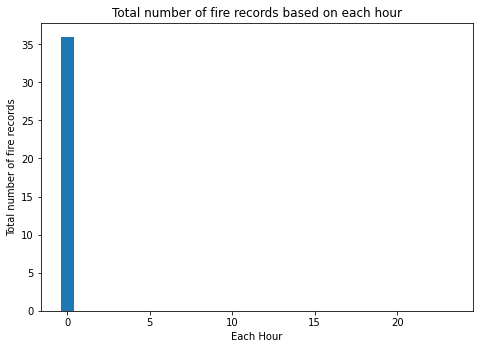

In [25]:
plt.close('all')
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Time, aDay)
ax.set_xlabel("Each Hour")
ax.set_ylabel("Total number of fire records")
ax.set_title("Total number of fire records based on each hour")
plt.show()

#### Part 2: Static data visualization

In [16]:
import folium

m = folium.Map(location = [-37.8136, 144.9631], zoom_start=13) #Melbourne city coordinates

In [21]:
collection = db.hotspot
results = collection.find({})
fire_lst = []
for document in results:
    hotspot = document['hotspot']
    if len(hotspot)>0:
        latitude = document['latitude']
        longitude = document['longitude']
        air_temp = document['air_temperature_celcius']
        for hotspot in hotspot:
            surface_temp = hotspot['surface_temperature_celcius']
            confidence = hotspot['confidence']
            event = hotspot['event']            
        fire_lst.append([latitude, longitude, surface_temp, confidence, air_temp, event])

{'_id': ObjectId('6288f7c236f426f9719ddce3'), 'latitude': -35.89, 'longitude': 145.606, 'air_temperature_celcius': 15.0, 'relative_humidity': 45.599998474121094, 'windspeed_knots': 10.199999809265137, 'max_wind_speed': 15.0, 'precipitation_type': 'G', 'GHI_w': 133.0, 'created_date': datetime.datetime(2019, 1, 6, 0, 0), 'hotspot': [{'latitude': -36.3017, 'longitude': 145.6213, 'confidence': 71.0, 'surface_temperature_celcius': 46.0, 'created_date': datetime.datetime(2022, 5, 22, 0, 31, 28, 992000), 'satellites': 'AQUA', 'event': 'others'}]}
[{'latitude': -36.3017, 'longitude': 145.6213, 'confidence': 71.0, 'surface_temperature_celcius': 46.0, 'created_date': datetime.datetime(2022, 5, 22, 0, 31, 28, 992000), 'satellites': 'AQUA', 'event': 'others'}]
{'_id': ObjectId('6288f7c236f426f9719ddce4'), 'latitude': -35.89, 'longitude': 145.606, 'air_temperature_celcius': 15.0, 'relative_humidity': 45.599998474121094, 'windspeed_knots': 10.199999809265137, 'max_wind_speed': 15.0, 'precipitation_t

In [22]:
information = ''
for record in fire_lst:
    latitude = record[0]
    longitude = record[1]
    surface_temp = record[2]
    confidence = record[3]
    air_temp = record[4]
    event = record[5]
    
    tooltip = "Click me!"

    html=f"""
        <ul>
        <li>Surface Temp: {surface_temp}</li>
        <li>Confidence: {confidence}</li>
        <li>Air Temp: {air_temp}</li>
        </ul>
        """
    
    if event == 'natural':
        folium.Marker(
            [latitude, longitude], popup=html, 
            icon=folium.Icon(color="blue"), tooltip=tooltip
        ).add_to(m)
    else:
        folium.Marker(
            [latitude, longitude], popup=html,
            icon=folium.Icon(color="red"), tooltip=tooltip
        ).add_to(m)

In [23]:
m